**Physics 3700 Lab 5**

*All requested plots need to be fully labelled. In addition to functional code, please fully explain what you’re doing and declare variables either by commenting your code or using markdown cells. Submit it to our course Moodle site.*

*In this lab you will be investigating the characteristics of the Discrete Fourier Transform (DFT) and the Inverse Discrete Fourier Transform (IDFT).*

$$X[k] = \sum_{n=0}^{N-1}x[n]e^{-j2\pi\frac{k}{N}n}$$

$$x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]e^{j2\pi\frac{k}{N}n}$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
import time

***1. Warm up.***

*(a) Write a function to perform the DFT. It should take in an input list and return a list containing
the elements of the DFT.*

In [51]:
def my_dft(x):
    k = 0
    N = len(x)
    X = [0.]*N
    while k < N:
        sum_1 = 0
        n=0
        while n < N:
            sum_1 = sum_1+x[n]*cmath.exp(complex(0, -(2*np.pi*k/N*n)))
            n+=1
        X[k] = sum_1
        k+=1
    return X    

*(b) Write a function to perform the IDFT. It should take in an input list in the frequency domain and return a list containing the elements in the time domain.*

In [99]:
def my_idft(X):
    n, k = 0,0
    N = len(X)
    x = [0.]*N
    while n < N:
        sum_1 = 0
        k=0
        while k < N:
            sum_1 = sum_1+1/N*X[k]*cmath.exp(complex(0,(2*np.pi*k/N*n)))
            k+=1
        x[n] = sum_1
        n+=1
    return x

*(c) Produce 100 cycles of a sine wave with a frequency of 60 Hz that is sampled at 256 Hz.*

256


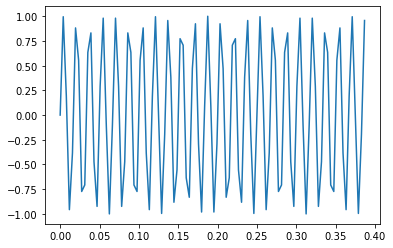

In [205]:
t = 100  # cycles
f = 60    # sine wave frequency
fs = 256  # sampling frequency

time = np.arange(0, t/f, 1/fs)
print(N)
sin_signal = [np.sin(2*np.pi*f*n) for n in time]
plt.plot(time[0:100],sin_signal[0:100])

*(d) Test your DFT function on the sine and check that it gives you the same results as* numpy.fft.fft.

In [195]:
f_space = np.linspace(0,fs,len(sin_signal))


<StemContainer object of 3 artists>

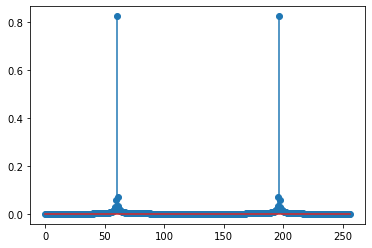

In [248]:
dft_of_signal = my_dft(sin_signal)
plt.stem(f_space,np.abs(dft_of_signal)/N)

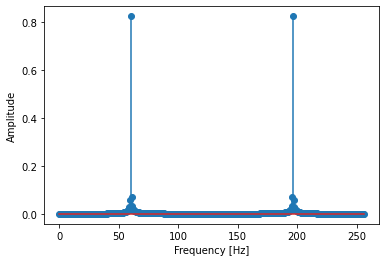

In [197]:
fft = np.fft.fft(sin_signal)        # Fourier transform of the sample and hold v   
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.stem(f_space,np.abs(fft)/N)
plt.show()

*(e) Test your IDFT function and check that it returns the sine wave.*

In [200]:
f_sin_signal = [np.sin(f*n) for n in f_space]
dft_of_fsignal = my_dft(f_sin_signal)
idft_of_dft_signal = my_idft(dft_of_fsignal)

/Users/Dallas/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


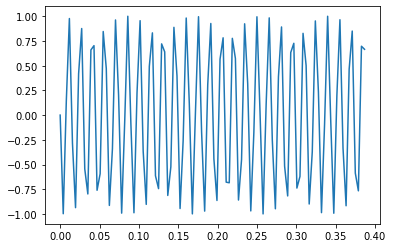

In [204]:
plt.plot(time[0:100], idft_of_dft_signal[0:100])

*(f) Using your DFT function, produce a stem plot of the DFT using the first 128 samples.*

In [230]:
sin_signal_128 = sin_signal[0:128]
dft_of_signal_128 = my_dft(sin_signal_128)


<StemContainer object of 3 artists>

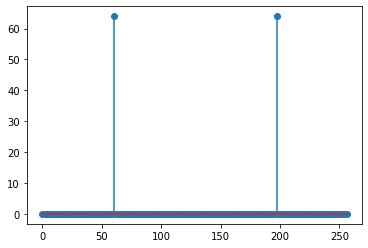

In [243]:
N_128 = len(sin_signal_128)
#f_space_128 = f_space[0:128]
f_space_128 = np.linspace(0,fs,len(sin_signal_128))
plt.stem(f_space_128, np.abs(dft_of_signal_128))

*(g) Using your DFT function, produce a stem plot of the DFT using the first 130 samples and explain why this graph looks different than the one above. (Hint: It may be clearer if you plot the DFT against Hz instead of sample number).*

<StemContainer object of 3 artists>

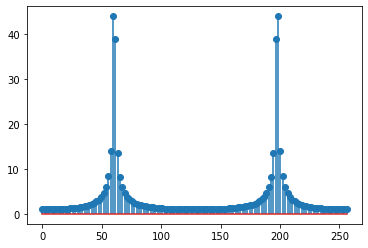

In [244]:
sin_signal_130 = sin_signal[0:130]
dft_of_signal_130 = my_dft(sin_signal_130)

N_130 = len(sin_signal_130)
f_space_130 = np.linspace(0,fs,len(sin_signal_130))
plt.stem(f_space_130,np.abs(dft_of_signal_130))

*(h) Using your DFT function, produce a stem plot of the DFT using the first 260 samples and explain why this graph looks different than the one above.*

<StemContainer object of 3 artists>

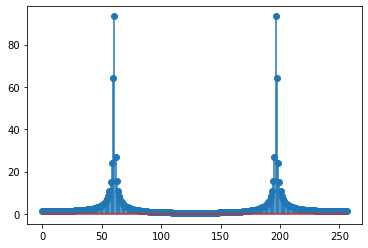

In [245]:
sin_signal_260 = sin_signal[0:250]
dft_of_signal_260 = my_dft(sin_signal_260)

N_260 = len(sin_signal_260)
f_space_260 = np.linspace(0,fs,len(sin_signal_260))
plt.stem(f_space_260,np.abs(dft_of_signal_260))

*(i) Remember that the DFT is a sampled version of the DTFT. To approximate the continuous DTFT (small sampling spacing, high frequency resolution) we can pad the signals with zeros. Take your first 128 samples of the sine wave and add 500 zeros after the last sample. Plot your DFT of this 628 element signal (use an actual plot instead of stem now). Describe the differences between this plot and the one obtained without zero-padding.*

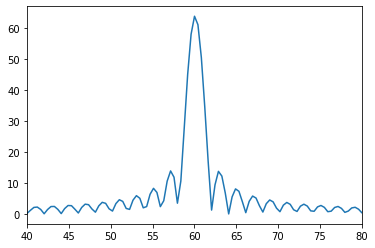

In [254]:
sin_signal_pad = sin_signal[0:128]+[0.]*500
dft_sin_signal_pad = my_dft(sin_signal_pad)

N_pad = len(sin_signal_pad)
f_space_pad = np.linspace(0,fs,len(sin_signal_pad))
plt.xlim(40,80)
plt.plot(f_space_pad,np.abs(dft_sin_signal_pad))

*(j) The ringing you saw in your last graph comes from “windowing” the 128 samples. Cutting out the 128 samples like that is equivalent to applying a square window to the 128 samples. One way to reduce the ringing is to apply a weighted window to the 128 sample points before zero-padding. Using your window functions from this week, apply the Hanning window, the Hamming window and the Blackman window in 3 different trials. Plot the resulting DFTs and compare the results of the 3 windows vs. the square window.*

In [282]:
nsamp=128       # number of sampling in $\Omega$ space...faking a continuous function
ndow=128
i=int(-(ndow-1)/2)
hn_hanning = [0.]*nsamp
while i <= ((ndow-1)/2):
    hn_hanning[i+ndow//2] = 0.5+0.5*np.cos(2*np.pi*i/(ndow-1))
    i+=1

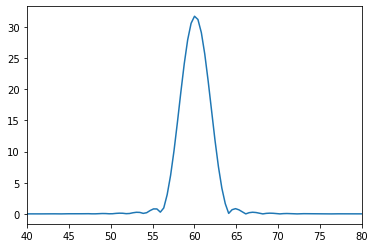

In [288]:
i = 0
sin_signal_han = [0.]*N_128
while i < N_128:
    sin_signal_han[i] = sin_signal_128[i] * hn_hanning[i]
    i+=1

sin_signal_han_pad = sin_signal_han+[0.]*500
dft_sin_signal_han_pad = my_dft(sin_signal_han_pad)

N_pad = len(sin_signal_han_pad)
f_space_pad = np.linspace(0,fs,N_pad)
plt.xlim(40,80)
plt.plot(f_space_pad,np.abs(dft_sin_signal_han_pad))


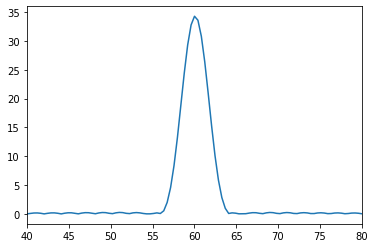

In [289]:
i=int(-(ndow-1)/2)
hn_hamming = [0.]*nsamp
while i <= ((ndow-1)/2):
    hn_hamming[i+ndow//2] = 0.54+0.46*np.cos(2*np.pi*i/(ndow-1))
    i+=1

i = 0
sin_signal_ham = [0.]*N_128
while i < N_128:
    sin_signal_ham[i] = sin_signal_128[i] * hn_hamming[i]
    i+=1

sin_signal_ham_pad = sin_signal_ham+[0.]*500
dft_sin_signal_ham_pad = my_dft(sin_signal_ham_pad)

plt.xlim(40,80)
plt.plot(f_space_pad,np.abs(dft_sin_signal_ham_pad))

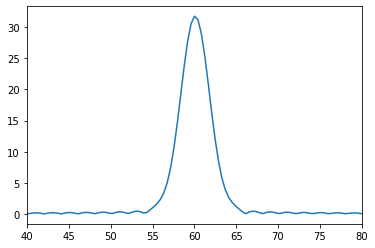

In [290]:
i=int(-(ndow-1)/2)
hn_black = [0.]*nsamp
while i <= ((ndow-1)/2):
    hn_black[i+ndow//2] = 0.5+0.5*np.cos(2*np.pi*i/(ndow-1))+0.08*np.cos(4*np.pi*i/(ndow-1))
    i+=1

i = 0
sin_signal_black = [0.]*N_128
while i < N_128:
    sin_signal_black[i] = sin_signal_128[i] * hn_black[i]
    i+=1

sin_signal_black_pad = sin_signal_black+[0.]*500
dft_sin_signal_black_pad = my_dft(sin_signal_black_pad)

plt.xlim(40,80)
plt.plot(f_space_pad,np.abs(dft_sin_signal_black_pad))

***2. Averaging DFTs.*** *One way to reduce noise in the DFT is to average a number of DFTS of segments of an input.*

*(a) Generate 300 cycles of a noisy square wave with the following function. Set f = 20 Hz and the sampling frequency equal to 800 Hz. Plot a segment of your wave.*
$$x(t) = \frac{4}{\pi}\sum_{k=1}^{7}\frac{sin(2\pi(2k-1)ft)}{2k-1}$$

*At each sample, add the following noise.* np.random.normal(0,.3)

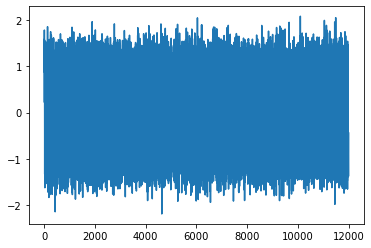

In [41]:
t1 = 300  # cycles
f1 = 20    # sine wave frequency
fs1 = 800  # sampling frequency

def sq_wave_func(t):
    x = [0]*t.size
    i = 0
    while i < t.size:
        sum_2 = 0
        k = 1
        while k <= 7:
            sum_2 = sum_2 + np.sin(2*np.pi*(2*k-1)*f1*t[i])/(2*k-1)
            k +=1

        x[i] = (4/np.pi)*sum_2+np.random.normal(0,0.3)
        i+=1
    return x

t = np.arange(0, t1/f1, 1/fs1)
x = sq_wave_func(t)

plt.plot(x)

*(b) Split the signal into 10 equal segments and apply your DFT to each segment. Plot the DFT of one of the segments.*

<StemContainer object of 3 artists>

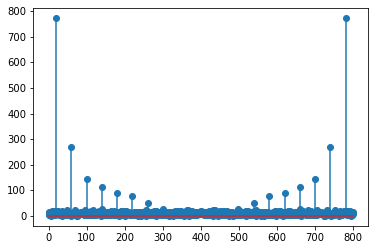

In [56]:
i = 0
x_segment_len = int(len(x)/10)
dft_of_x = [0]*10
while i <=9:
    x_segment = x[i*x_segment_len:(i+1)*x_segment_len]
    dft_of_x[i] = my_dft(x_segment)
    i += 1

f_space_x = np.linspace(0,fs1,len(dft_of_x[0]))
plt.stem(f_space_x,np.abs(dft_of_x[0]))

<StemContainer object of 3 artists>

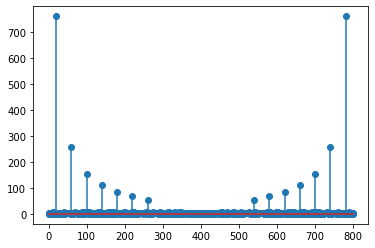

In [80]:
j = 0
sum_list = []
while j < len(dft_of_x[0]):
    i = 0
    sum_num = 0
    while i < len(dft_of_x):
        sum_num = sum_num + dft_of_x[i][j]
        i += 1
    sum_list.append(sum_num/10)
    j+=1
    
f_space_x = np.linspace(0,fs1,len(sum_list))
plt.stem(f_space_x,np.abs(sum_list))

*(c) Stack (i.e. average) the 10 DFTs into 1 DFT and plot the average and one segment’s DFT on the same plot. Comment on differences.*

*(d) Apply your IDFT function to the averaged DFT and plot the resulting waveform. You can cheat a little and zero the elements of the higher frequencies you’re sure shouldn’t be there. This is just for visual effect. If you don’t know what frequencies your signal contains you shouldn’t be doing this.*

***3. Convolution in the Frequency Domain.*** *Sometimes you’ll want to avoid a convolution in the time domain. A convolution in the time domain is equivalent to a multiplication in the frequency domain. An application of this idea is when you have an output and a theoretical impulse function and you would like to perform a deconvolution to obtain the original input/signal. This is common in imaging when you would like to remove the effects of the optics (medical or astronomical images).*

*(a) Two labs ago you performed a convolution to smooth the following noisy input. Redo the following so you have a reference output. Convolve the signal with a 20 point sinc function to smooth the noise.*

       A=2
       f=50.0
       T=1/f
       fs=50*f
       Ts=1/fs
       cycles=5
       t=np.arange(0,cycles*T,Ts)
       i=0
       x=[0.]*len(t)
       while i < len(t):
           x[i]=A*np.sin(2*np.pi*f*t[i])+A*np.sin(.5*np.pi*f*t[i])+np.random.normal(0,.2)
           i+=1
       plt.plot(x)
       plt.show()

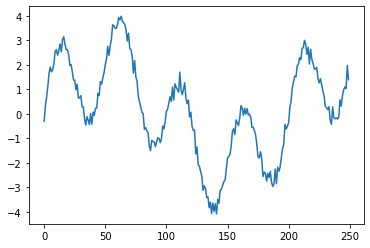

In [79]:
A=2
f=50.0
T=1/f
fs=50*f
Ts=1/fs
cycles=5
t=np.arange(0,cycles*T,Ts)
i=0
x=[0.]*len(t)
while i < len(t):
    x[i]=A*np.sin(2*np.pi*f*t[i])+A*np.sin(.5*np.pi*f*t[i])+np.random.normal(0,.2)
    i+=1
plt.plot(x)
plt.show()

In [83]:
def myconv(x,h):
    '''This function takes a 2 lists of numbers and convolves them.'''
    i = 0
    lst = []
    while (i < (len(x)+len(h))-1):
        j=0
        value = 0
        while (j < len(h)):
            if ((i-j)>=0) and ((i-j)<len(x)):
                value = value + h[j]*x[i-j]
            j+=1
        lst.append(value)
        i+=1
    return lst

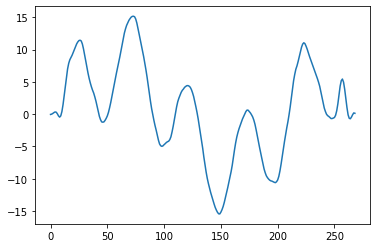

In [93]:
lst = np.arange(-(20)/8,(20)/8,1/4)
value_sinc = [np.sinc(n) for n in lst]
x_smoothed = myconv(x,value_sinc)
plt.plot(x_smoothed)

*(b) Apply your DFT to the input and the smoothing filter. Multiply the two DFTs and apply your IDFT function.*

In [102]:
dft_x = my_dft(x)
dft_x_smoothed = my_dft(x_smoothed)
multiplied_dfts = []
for i1, i2 in zip(dft_x, dft_x_smoothed):
    multiplied_dfts.append(i1*i2)

idft_multiplied_dfts = my_idft(multiplied_dfts)


*(c) Plot the output using convolution and using the two multiplied DFTs on the same plot to check that they match. You should decide how to deal with any circular convolution issues. Comment on any differences.*

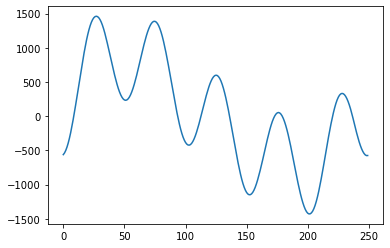

In [104]:
plt.plot(idft_multiplied_dfts)
#plt.plot(x_smoothed)

*(d) Convolve the following signal with an 8 point Hamming window and plot the output. Describe how the window affects the input.*
       
       A=2
       f=50.0
       T=1/f
       fs=100*f
       Ts=1/fs
       cycles=5
       t=np.arange(0,cycles*T,Ts)
       i=0
       x=[0.]*len(t)
       while i < len(t):
           x[i]=A*np.sin(2*np.pi*f*t[i])+A*np.sin(3*np.pi*f*t[i])+np.random.normal(0,.6)
           i+=1
       plt.plot(x)
       plt.show()

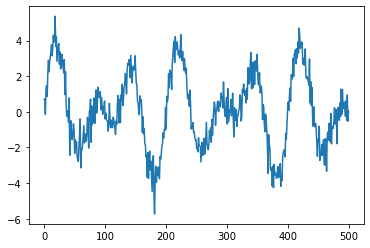

In [108]:
A=2
f=50.0
T=1/f
fs=100*f
Ts=1/fs
cycles=5
t=np.arange(0,cycles*T,Ts)
i=0
x1=[0.]*len(t)
while i < len(t):
    x1[i]=A*np.sin(2*np.pi*f*t[i])+A*np.sin(3*np.pi*f*t[i])+np.random.normal(0,.6)
    i+=1
plt.plot(x1)
plt.show()

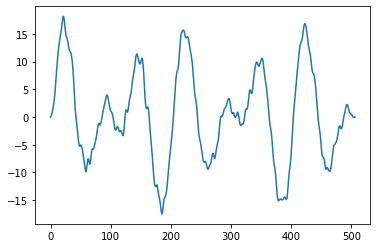

In [110]:
i=int(-(8-1)/2)
hn_hamming_1 = [0.]*8
while i <= ((8-1)/2):
    hn_hamming_1[i+8//2] = 0.54+0.46*np.cos(2*np.pi*i/(8))
    i+=1
x_smoothed_1 = myconv(x1,hn_hamming_1)
plt.plot(x_smoothed_1)

*(e) Apply your DFT to the output and the Hamming window. Divide the DFT of the output by the DFT of the Hamming window. Apply your IDFT function to the result of the division.*

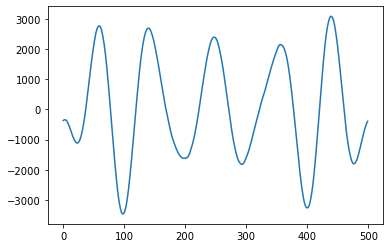

In [119]:
dft_x1 = my_dft(x1)
dft_x_smoothed_1 = my_dft(x_smoothed_1)
divided_dfts = []
for i1, i2 in zip(dft_x1, dft_x_smoothed_1):
    divided_dfts.append(i1*i2)
idft_divided_dfts = my_idft(divided_dfts)
plt.plot(idft_divided_dfts)

*(f) Plot the actual input and the input found by the division above on the same plot to check that they match. Comment on any differences. This usually isn’t the ideal method to apply since noise in the denominator DFT could give you values very close to or exactly zero.*